# Readme

Not every algo in the library is complex. Aside from make convenience for the future use, the ML is also use to remind myself what I know and what I should learn

# Agenda  <a name="backtotop"></a>
---

1. [CrossValidation](#CrossValidation)
2. [Split Training and Testing Data](#SplitTrainingTestingData)
3. [Decision Tree](#DecisionTree)
4. [Community](#Community)
5. [Logistic Regression](#LR)
6. [Multinomial Naive Bayes](#MNB)

## CrossValidation<a name="CrossValidation">
</a>


[back to top](#backtotop)

In [2]:
def CrossValidation(df, niter, f, *argvs):
    accuracy = []
    random_df = df.sample(frac = 1)
    testing_len = int(len(random_df)/niter)
    for i in range(niter):
        df_testing = random_df.iloc[i*testing_len: (i+1)*testing_len]
        df_training = pd.concat([random_df.iloc[:i*testing_len],
                                       random_df.iloc[(i+1)*testing_len:]])
        accuracy.append(f(df_training, df_testing, *argvs))
        print("Iteration %d -- accuracy %f"%(i, accuracy[-1]))
    return np.average(accuracy)

## Split Training and Testing Data<a name="SplitTrainingTestingData">
</a>


[back to top](#backtotop)

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

features, target = load_wine(return_X_y=True)
data = load_wine()
sample_df = pd.concat([pd.DataFrame(features, columns = data.feature_names), pd.DataFrame(target, columns = ["target"])], axis = 1)


x_train, x_test, y_train, y_test = train_test_split(sample_df, target,
                                                    test_size = 0.1, random_state = 42, stratify = target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

## Decision  Tree<a name="DecisionTree">
</a>


[back to top](#backtotop)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target,
                                                    test_size = 0.1, random_state = 3)


def DecisionTree(x_train, x_test, y_train, y_test):
    iris_classifier = DecisionTreeClassifier(random_state=0)
    iris_classifier.fit(x_train, y_train)
    y_predict = iris_classifier.predict(x_test)
    print("Accuracy From Decision Tree: ",accuracy_score(y_test, y_predict))
DecisionTree(x_train, x_test, y_train, y_test)

Accuracy From Decision Tree:  1.0


## Community on Networkx<a name="Community">
</a>


[back to top](#backtotop)

dict_values([0, 1, 2, 3, 2, 4, 5, 6, 7, 0, 8, 9, 7, 0, 10, 11, 3, 12, 12, 13, 5, 2, 14, 15, 9, 16, 5, 17, 2, 14])


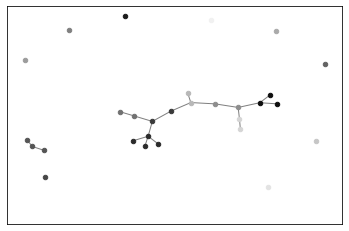

In [17]:
%matplotlib inline
import community
import networkx as nx
import matplotlib.pyplot as plt

#better with karate_graph() as defined in networkx example.
#erdos renyi don't have true community structure
G = nx.erdos_renyi_graph(30, 0.05)

#first compute the best partition
partition = community.best_partition(G)
print(partition.values())

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

## Logistic Regression<a name="LR">
</a>


[back to top](#backtotop)
***
**Code:**
```python
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
```

## Mutinomial Naive Bayes<a name="MNB">
</a>


[back to top](#backtotop)
***
**Code:**
```python
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB(alpha = ...)
```

**Hyperparameter commonly tuned**: alpha